*As a member of the data science team at a prestigious fast fashion firm, our job is to help increase revenues through all possible (legal) means. The online platform is going strong. However, we would like to improve the recommender system on your platform. Our plan is to test different recommendation systems and pick the most suitable one.*

### **Loading the modules**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### **Loading the three csv files with pandas**

In [2]:
# loading users metadata
customers_df = pd.read_csv("recsys_customers.csv")

# loading training data
transactions_df = pd.read_csv("recsys_transactions.csv")

# loading articles metadata
articles_df = pd.read_csv("recsys_articles.csv")

###### **Removing NaN values**

In [3]:
customers_df = customers_df.fillna(0)

transactions_df = transactions_df.fillna(0)

articles_df = articles_df.fillna(0)

##### **Combining the three csv files into one using common columns**

In [4]:
# joining customers and transactions on customer id
merged_df = pd.merge(customers_df, transactions_df, on = 'customer_id')

In [5]:
# joining the merged data frame and articles on article id
final_df = pd.merge(merged_df, articles_df, on = 'article_id')

### **Explantory Data Analysis - (EDA)**

##### **Looking at the first and last 5 rows of the dataset**

In [6]:
final_df.head()

,customer_id,fashion_news,club_member,age,t_dat,article_id,prod_name,product_type,product_type_name,product_group_name,...,department,department_name,index,index_name,index_group,index_group_name,section,section_name,garment_group,garment_group_name
0,0,1,1,44.0,2020-09-05,463,Beverly HW Loose Mom Fit Dnm,272,Trousers,Garment Lower body,...,1747,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers
1,70,0,0,27.0,2020-09-06,463,Beverly HW Loose Mom Fit Dnm,272,Trousers,Garment Lower body,...,1747,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers
2,75,1,1,21.0,2020-09-18,463,Beverly HW Loose Mom Fit Dnm,272,Trousers,Garment Lower body,...,1747,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers
3,82,0,0,18.0,2020-09-13,463,Beverly HW Loose Mom Fit Dnm,272,Trousers,Garment Lower body,...,1747,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers
4,111,0,0,33.0,2020-09-06,463,Beverly HW Loose Mom Fit Dnm,272,Trousers,Garment Lower body,...,1747,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers


In [7]:
final_df.tail()

,customer_id,fashion_news,club_member,age,t_dat,article_id,prod_name,product_type,product_type_name,product_group_name,...,department,department_name,index,index_name,index_group,index_group_name,section,section_name,garment_group,garment_group_name
369108,30652,0,0,39.0,2020-09-10,365,STINA 5PACK boxer,286,Underwear bottom,Underwear,...,7932,Young Girl UW/NW,I,Children Sizes 134-170,4,Baby/Children,79,Girls Underwear & Basics,1017,"Under-, Nightwear"
369109,33609,1,1,48.0,2020-09-04,365,STINA 5PACK boxer,286,Underwear bottom,Underwear,...,7932,Young Girl UW/NW,I,Children Sizes 134-170,4,Baby/Children,79,Girls Underwear & Basics,1017,"Under-, Nightwear"
369110,38812,0,0,43.0,2020-09-16,365,STINA 5PACK boxer,286,Underwear bottom,Underwear,...,7932,Young Girl UW/NW,I,Children Sizes 134-170,4,Baby/Children,79,Girls Underwear & Basics,1017,"Under-, Nightwear"
369111,38812,0,0,43.0,2020-09-16,365,STINA 5PACK boxer,286,Underwear bottom,Underwear,...,7932,Young Girl UW/NW,I,Children Sizes 134-170,4,Baby/Children,79,Girls Underwear & Basics,1017,"Under-, Nightwear"
369112,40236,1,1,48.0,2020-09-04,365,STINA 5PACK boxer,286,Underwear bottom,Underwear,...,7932,Young Girl UW/NW,I,Children Sizes 134-170,4,Baby/Children,79,Girls Underwear & Basics,1017,"Under-, Nightwear"


##### **Some basic statistical summaries of the numerical columns in the dataframe**

In [8]:
final_df.describe()

,customer_id,fashion_news,club_member,age,article_id,product_type,colour_group,perceived_colour_value,perceived_colour_master,department,index_group,section,garment_group
count,369113.000000,369113.000000,369113.000000,369113.000000,369113.000000,369113.000000,369113.000000,369113.000000,369113.000000,369113.00000,369113.000000,369113.000000,369113.000000
mean,20617.658362,0.443493,0.437489,35.058562,3468.197490,254.284636,22.800996,3.017382,7.236849,2545.16181,2.785654,32.863473,1009.107011
std,11932.416246,0.496797,0.496078,12.621653,1947.820715,57.312755,24.714851,1.345473,4.610611,1908.60415,5.717297,22.393015,6.043188
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,-1.000000,1201.00000,1.000000,2.000000,1001.000000
25%,10244.000000,0.000000,0.000000,25.000000,1664.000000,253.000000,9.000000,2.000000,5.000000,1610.00000,1.000000,15.000000,1003.000000
50%,20618.000000,0.000000,0.000000,30.000000,3635.000000,262.000000,10.000000,4.000000,5.000000,1666.00000,1.000000,19.000000,1009.000000
75%,30974.000000,1.000000,1.000000,46.000000,5272.000000,272.000000,19.000000,4.000000,11.000000,3090.00000,2.000000,53.000000,1016.000000
max,41252.000000,1.000000,1.000000,91.000000,6535.000000,532.000000,93.000000,7.000000,20.000000,9989.00000,26.000000,80.000000,1025.000000


In [9]:
final_df.info

<bound method DataFrame.info of         customer_id  fashion_news  club_member   age       t_dat  article_id  \
0                 0             1            1  44.0  2020-09-05         463   
1                70             0            0  27.0  2020-09-06         463   
2                75             1            1  21.0  2020-09-18         463   
3                82             0            0  18.0  2020-09-13         463   
4               111             0            0  33.0  2020-09-06         463   
...             ...           ...          ...   ...         ...         ...   
369108        30652             0            0  39.0  2020-09-10         365   
369109        33609             1            1  48.0  2020-09-04         365   
369110        38812             0            0  43.0  2020-09-16         365   
369111        38812             0            0  43.0  2020-09-16         365   
369112        40236             1            1  48.0  2020-09-04         365   

       

In [10]:
final_df.dtypes

customer_id                       int64
fashion_news                      int64
club_member                       int64
age                             float64
t_dat                            object
article_id                        int64
prod_name                        object
product_type                      int64
product_type_name                object
product_group_name               object
colour_group                      int64
colour_group_name                object
perceived_colour_value            int64
perceived_colour_value_name      object
perceived_colour_master           int64
perceived_colour_master_name     object
department                        int64
department_name                  object
index                            object
index_name                       object
index_group                       int64
index_group_name                 object
section                           int64
section_name                     object
garment_group                     int64


##### **The distribution of numerical columns**

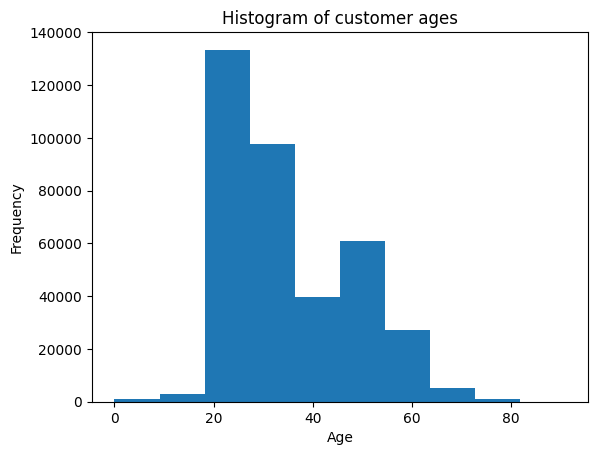

In [11]:
# Plot the histogram for the 'age' column
plt.hist(final_df['age'])

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of customer ages')

plt.show()

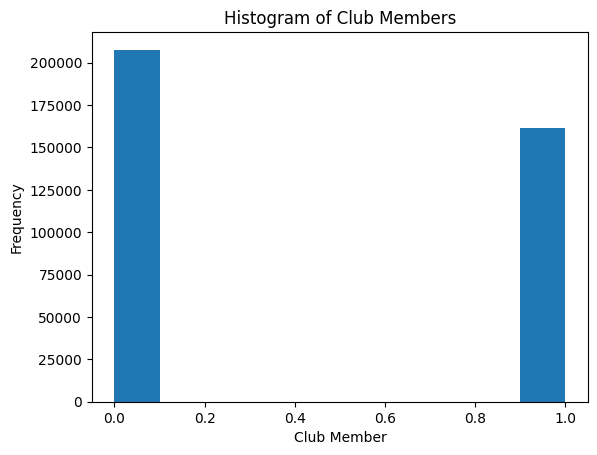

In [12]:
# Plot the histogram for the 'club_member' column
plt.hist(final_df['club_member'])

plt.xlabel('Club Member')
plt.ylabel('Frequency')
plt.title('Histogram of Club Members')

plt.show()

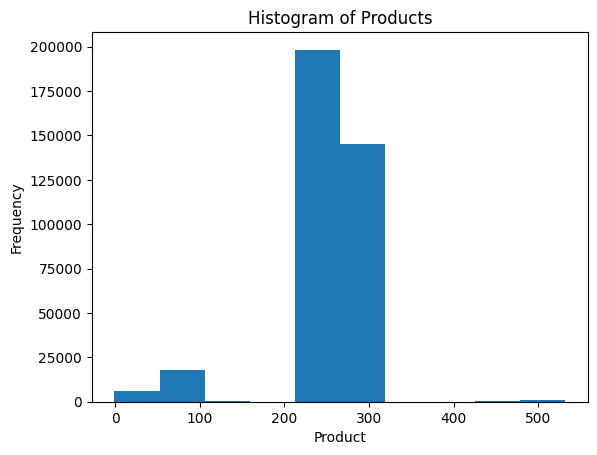

In [13]:
# Plot the histogram for the 'product_type' column
plt.hist(final_df['product_type'])

plt.xlabel('Product')
plt.ylabel('Frequency')
plt.title('Histogram of Products')

plt.show()

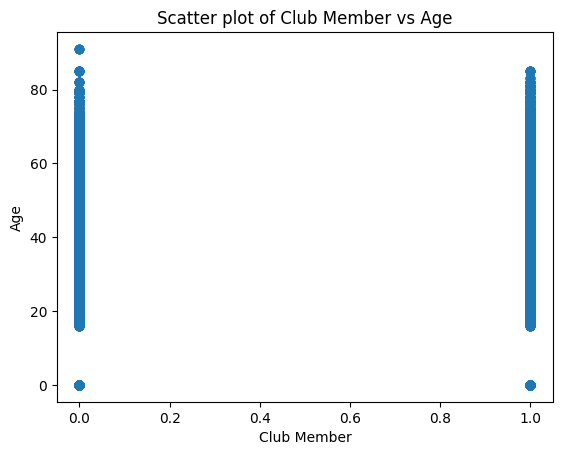

In [14]:
# Scatter plot of 'age' vs 'club_memeber'
plt.scatter(final_df['club_member'], final_df['age'])

plt.xlabel('Club Member')
plt.ylabel('Age')
plt.title('Scatter plot of Club Member vs Age')

plt.show()

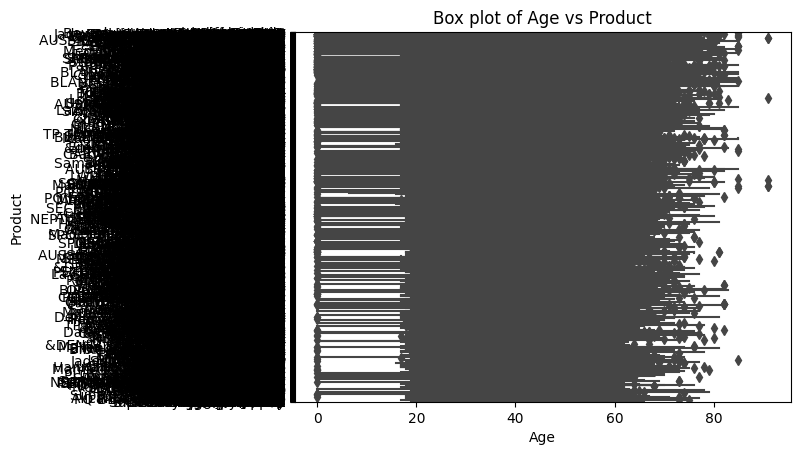

In [15]:
# Box plot of 'Age' vs 'Product Name'
sns.boxplot(x = 'age', y = 'prod_name', data = final_df)

plt.xlabel('Age')
plt.ylabel('Product')
plt.title('Box plot of Age vs Product')

plt.show()

###### **Most Popular Products**

Top 3 popular products:
1. "1419" with 1045 purchases
2. "168" with 896 purchases
3. "5831" with 889 purchases


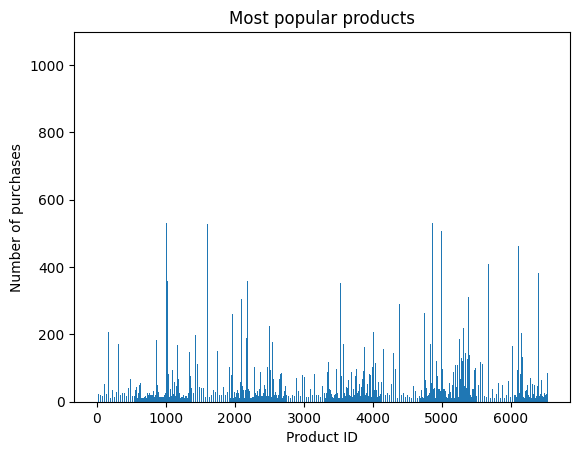

In [16]:
# Group the data by article_id and count the number of purchases for each product
product_counts = transactions_df.groupby('article_id').size().reset_index(name = 'count')

# Sort the data by the count column in descending order
product_counts = product_counts.sort_values('count', ascending = False)

# Set the number of top products to print out
n = 3

# Print the top n popular products
print(f'Top {n} popular products:')

# Iterate over the first n rows of the product_counts DataFrame
for i in range(n):
    # Get the product data for the current row
    product = product_counts.iloc[i]
    
    # Print the product id and the number of purchases
    print(f'{i+1}. "{product["article_id"]}" with {product["count"]} purchases')

# Plot the data using a bar chart
plt.bar(product_counts['article_id'], product_counts['count'])

# Add axis labels and a title to the plot
plt.xlabel('Product ID')
plt.ylabel('Number of purchases')
plt.title('Most popular products')

# Display the plot
plt.show()

###### **Customers with their number of purchases**

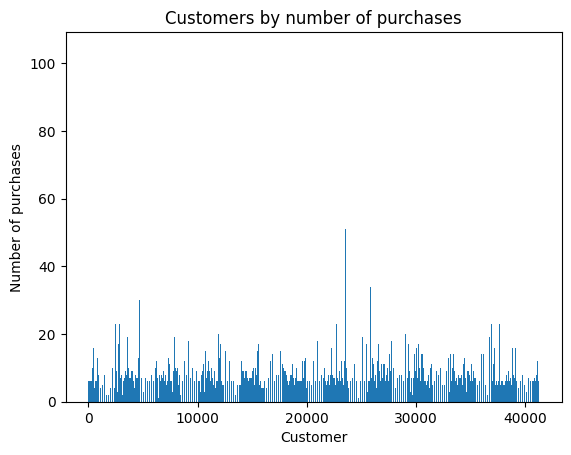

In [17]:
# Group the data by customer_id and count the number of purchases for each customer
customer_counts = transactions_df.groupby('customer_id').size().reset_index(name = 'count')

# Sort the data by the count column in descending order
customer_counts = customer_counts.sort_values('count', ascending = False)

# Plot the data using a bar chart
plt.bar(customer_counts['customer_id'], customer_counts['count'])

# Add axis labels and a title to the plot
plt.xlabel('Customer')
plt.ylabel('Number of purchases')
plt.title('Customers by number of purchases')

# Display the plot
plt.show()

#### **Data Cleaning and Preporcessing**

##### **Imputing Missing Values**

`Completing missing values using descriptive statistics, most frequent, along each column using SimpleImputer from Sklearn.`

This code defines a function called impute_missing_values that takes in a dataframe and an imputation method and returns a new dataframe with missing values imputed using the specified method.

The function first checks the value of the method parameter and assigns a corresponding SimpleImputer object to the imputer variable. If the method parameter is not one of the three supported values ('mean', 'median', or 'mode'), the function raises a ValueError.

Next, the function applies the fit_transform method of the imputer object on the input dataframe, and creates a new dataframe with the imputed values using the pd.DataFrame constructor. The resulting dataframe is returned as the output of the function.

Finally, the code calls the impute_missing_values function on the final_df dataframe with the mode imputation method, and assigns the returned dataframe to the df variable.

In [18]:
from sklearn.impute import SimpleImputer

def impute_missing_values(df, method):
    """Impute missing values in the dataframe using the specified method.
    
    Parameters:
        df (pandas.DataFrame): The dataframe with missing values.
        method (str): The imputation method to use. Can be 'mean', 'median', or 'mode'.
    
    Returns:
        pandas.DataFrame: The dataframe with missing values imputed.
    """

    if method == 'mean':
        imputer = SimpleImputer(strategy = 'mean')
    elif method == 'median':
        imputer = SimpleImputer(strategy = 'median')
    elif method == 'mode':
        imputer = SimpleImputer(strategy = 'most_frequent')
    else:
        raise ValueError("Invalid imputation method: {}".format(method))
    
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)
    
    return df_imputed

df = impute_missing_values(final_df, 'mode')

### **Building the System**

##### **Content-Based Filtering Recommendation System**

This code is used to recommend articles to a customer based on their past purchases. To do this, the code follows these steps:

Merges the transactions_df and articles_df dataframes on the article_id column. This creates a single dataframe containing information about the transactions and the corresponding articles.

Groups the merged dataframe by customer_id and aggregates the prod_name column with a list. This creates a new dataframe that lists the products purchased by each customer.

Merges the resulting dataframe with the customers_df dataframe on the customer_id column. This creates a single dataframe containing information about the customers, their purchases, and the corresponding articles.

Creates a DictVectorizer object and fits it on a list of dictionaries, where each dictionary represents a purchased article. The DictVectorizer is then used to transform this list of dictionaries into a matrix X.

Creates a NearestNeighbors object and fits it on the matrix X.

Defines the recommend_articles function to recommend articles based on the nearest neighbors of the purchased articles. Inside the function, the code gets the row of the customer from the dataframe, gets the list of purchased articles, and creates a list of dictionaries where each dictionary represents a purchased article. This list of dictionaries is then transformed into a matrix X_customer using the DictVectorizer object. The NearestNeighbors object is used to find the indices of the k nearest neighbors of X_customer, and the recommended articles are obtained from the dataframe using these indices. The recommended articles are then concatenated into a single list, duplicates are removed, and the final list is sliced to get the desired number of recommendations.

Finally, the code tests the recommend_articles function by calling it with a customer id and the desired number of recommendations, and prints the recommended articles for the customer.

The code first merges the transactions_df and articles_df dataframes on the article_id column and then groups the merged dataframe by customer_id and aggregates the prod_name column with a list. It then merges this resulting dataframe with the customers_df dataframe on the customer_id column.

In [19]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.neighbors import NearestNeighbors


# merge the transactions and articles dataframes on the article_id column
df_transactions_articles = pd.merge(transactions_df, articles_df, on = 'article_id')

# group the merged dataframe by customer_id and aggregate the prod_name column with a list
df_customer_purchases = df_transactions_articles.groupby('customer_id')['prod_name'].apply(list).reset_index()

# merge the customer_purchases dataframe with the customers dataframe on the customer_id column
df = pd.merge(df_customer_purchases, customers_df, on = 'customer_id')

Under, the code creates a DictVectorizer object and fits it on a list of dictionaries, where each dictionary represents a purchased article. The DictVectorizer is then used to transform this list of dictionaries into a matrix X.

The code then creates a NearestNeighbors object, fits it on the matrix X, and defines the recommend_articles function to recommend articles based on the nearest neighbors of the purchased articles.

In [20]:
# create a DictVectorizer object
vectorizer = DictVectorizer()

# create a list of dictionaries where each dictionary represents a purchased article
purchased_articles = [{'prod_name': prod_name} for prod_name in df['prod_name']]

# fit the vectorizer on the list of dictionaries
vectorizer.fit(purchased_articles)

# transform the list of dictionaries into a matrix
X = vectorizer.transform(purchased_articles)

# create a NearestNeighbors object
nn = NearestNeighbors(n_neighbors = 11)

# fit the NearestNeighbors object on the matrix of token counts
nn.fit(X)

NearestNeighbors(n_neighbors=11)

Inside the recommend_articles function, the code gets the row of the customer from the dataframe, gets the list of purchased articles, and creates a list of dictionaries where each dictionary represents a purchased article. This list of dictionaries is then transformed into a matrix X_customer using the DictVectorizer object. The NearestNeighbors object is used to find the indices of the k nearest neighbors of X_customer, and the recommended articles are obtained from the dataframe using these indices. The recommended articles are then concatenated into a single list, duplicates are removed, and the final list is sliced to get the desired number of recommendations.

In [21]:
# define a function to recommend articles
def recommend_articles(customer_id, n_recommendations):
  # get the row of the customer from the dataframe
  customer_row = df[df['customer_id'] == customer_id]
  
  # get the list of purchased articles
  purchased_articles = customer_row['prod_name'].values[0]
  
  # create a list of dictionaries where each dictionary represents a purchased article
  purchased_articles_dict = [{'prod_name': prod_name} for prod_name in purchased_articles]
  
  # transform the list of dictionaries into a matrix
  X_customer = vectorizer.transform(purchased_articles_dict)
  
  # get the indices of the k nearest neighbors
  distances, indices = nn.kneighbors(X_customer)
  
  # get the list of recommended articles
  recommended_articles = df.iloc[indices[0][1:]]['prod_name'].tolist()
  
  # concatenate the lists in the recommended_articles column into a single list
  recommended_articles = [item for sublist in recommended_articles for item in sublist]
  
  # remove any duplicates in the recommendations
  recommended_articles = list(set(recommended_articles))
  
  # slice the list to get the number of recommendations specified
  recommended_articles = recommended_articles[:n_recommendations]
  
  return recommended_articles

# test the recommend_articles function
customer_id = 1
n_recommendations = 5
recommended_articles_content = recommend_articles(customer_id, n_recommendations)

print(f'Recommended articles for customer {customer_id}: {recommended_articles_content}')

Recommended articles for customer 1: ['Burmilla petite blazer', 'Pink HW barrel', 'HM+ Tina dress', 'Aubergine', 'Velvet scrunchie']


##### **Hyperparameter Tuning**

This code defines a set of search parameters for a RandomizedSearchCV object and uses it to search for the best parameters for a given model.

The search parameters are defined as a dictionary called param_grid with two keys: 'n_neighbors' and 'metric'. The value of 'n_neighbors' is a list of integers ranging from 0 to 30, and the value of 'metric' is a list of three string values representing different distance metrics.

Next, the code creates a RandomizedSearchCV object with the model (nn), the search parameters (param_grid), the number of folds for cross-validation (cv), the random seed (random_state), and the scoring metric (scoring). The RandomizedSearchCV object is then fit on the matrix of token counts (X).

Finally, the code prints the best parameters found by the RandomizedSearchCV object using the best_params_ attribute. These best parameters can then be used to optimize the performance of the model.

In [22]:
from sklearn.model_selection import RandomizedSearchCV

# defining the search parameters
param_grid = {'n_neighbors': [x for x in range(31)],
              'metric': ['minkowski', 'cosine', 'euclidean']
            }

# create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator = nn, param_distributions = param_grid, cv = 5, random_state = 42, scoring = 'neg_mean_squared_error')

# fit the RandomizedSearchCV object on the matrix of token counts
random_search.fit(X)

# print the best parameters
print(f'best parameters are: {random_search.best_params_}')

best parameters are: {'n_neighbors': 9, 'metric': 'cosine'}


This code uses the best parameters found by a RandomizedSearchCV object to create a new NearestNeighbors object and fit it on the matrix of token counts (X).

The code first gets the best parameters from the RandomizedSearchCV object using the best_params_ attribute. It then creates a new NearestNeighbors object using these best parameters, using the ** operator to unpack the dictionary of best parameters as keyword arguments.

Next, the code fits the new NearestNeighbors object on the matrix of token counts using the fit method.

Finally, the code calls the recommend_articles function with the new NearestNeighbors object and the customer id and number of recommendations as arguments, and prints the recommended articles for the customer.

In [23]:
# get the best parameters from the random search
best_params = random_search.best_params_

# create a NearestNeighbors object with the best parameters
nn_best = NearestNeighbors(**best_params)

# fit the NearestNeighbors object on the matrix of token counts
nn_best.fit(X)

# use the recommend_articles function with the best NearestNeighbors object
recommended_articles_content = recommend_articles(customer_id, n_recommendations)

print(f'Recommended articles for customer {customer_id}: {recommended_articles_content}')

Recommended articles for customer 1: ['Burmilla petite blazer', 'Pink HW barrel', 'HM+ Tina dress', 'Aubergine', 'Velvet scrunchie']


##### **Evaluating the Performance**

This code defines a function called content_based_performance that takes in a customer id and a list of recommendations and returns a measure of the similarity between the purchased articles of the customer and the recommended articles.

The function first retrieves the purchased articles for the given customer id from the dataframe and transforms the list of purchased articles into a matrix using the DictVectorizer object. It then transforms the list of recommendations into a matrix in the same way.

Next, the function computes the cosine similarity between the two matrices using the cosine_similarity function from sklearn.metrics.pairwise. This function returns a matrix of similarity values, and the function selects the first row (corresponding to the purchased articles) and computes the mean of the similarity values as the overall similarity between the purchased articles and the recommendations.

Finally, the code calls the content_based_performance function with the customer id and the list of recommended articles, and prints the similarity value.

In [24]:
from sklearn.metrics.pairwise import cosine_similarity


def content_based_performance(customer_id, recommendations):
  # retrieve the purchased articles for the given customer_id from the dataframe
  customer_row = df[df['customer_id'] == customer_id]
  purchased_articles = customer_row['prod_name'].values[0]
  
  # transform the list of purchased articles into a matrix
  X_purchased = vectorizer.transform([{'prod_name': prod_name} for prod_name in purchased_articles])
  
  # transform the list of recommendations into a matrix
  X_recommendations = vectorizer.transform([{'prod_name': recommendation} for recommendation in recommendations])
  
  # compute the cosine similarity between the purchased articles and the recommendations
  similarity = cosine_similarity(X_purchased, X_recommendations)
  
  # compute the accuracy as the average of the cosine similarity values
  accuracy = np.mean(similarity[0])
  
  return accuracy


Similarity = content_based_performance(customer_id, recommended_articles_content)
print(f'Similarity for customer {customer_id}: {Similarity}')

Similarity for customer 1: 0.0


##### **Collaborative-Based Filtering Recommendation System**

This code merges the transactions_df and articles_df dataframes on the article_id column to get a dataframe with information about the articles purchased by each customer.

It then uses the pivot_table method of the merged dataframe to create a pivot table with customers as rows and articles as columns. The values in the pivot table are the number of times each article was purchased by each customer, as counted using the count aggregation function. Missing values (i.e., articles that were not purchased by a given customer) are filled with 0 using the fill_value parameter.

The resulting pivot table can be used to represent the purchase history of each customer as a vector of counts, with each element of the vector corresponding to the number of times a given article was purchased. This representation can be used as input to a recommendation system that uses collaborative filtering to make recommendations based on the purchase history of similar customers.

In [25]:
# Merge the transactions and articles data to get the articles that each customer has purchased
df_data = pd.merge(transactions_df, articles_df, on = "article_id")

# Pivot the merged data to get a matrix with customers as rows and articles as columns
pivot_df = df_data.pivot_table(index = "customer_id", columns = "prod_name", values = "article_id", aggfunc = "count", fill_value = 0)

This code creates a NearestNeighbors model using the NearestNeighbors class from the sklearn library. The model is initialized with n_neighbors equal to 5, which means that it will find the 5 nearest neighbors of a given customer when making recommendations. The algorithm parameter specifies the algorithm to use for finding the nearest neighbors, in this case the "ball tree" algorithm.

The code then fits the model on the pivot table of customer purchase history using the fit method. This means that the model is trained on the purchase history data, and can be used to find the nearest neighbors of a given customer based on their purchase history vector.

The NearestNeighbors model can be used to make recommendations to a given customer by finding the nearest neighbors of the customer in the purchase history data, and recommending the articles that are most popular among these neighbors. This is an example of a recommendation system that uses collaborative filtering, as it makes recommendations based on the preferences of similar users rather than the content of the items being recommended.

In [26]:
# Create the NearestNeighbors model
model = NearestNeighbors(n_neighbors = 5, algorithm = "ball_tree")

# Fit the model on the pivoted data
model.fit(pivot_df)

NearestNeighbors(algorithm='ball_tree')

This code defines a function called recommend_articles_collaborative that takes in a customer id and a number of recommendations to return, and returns a list of recommended articles for the customer using collaborative filtering.

The function first retrieves the customer's row from the pivot table of customer purchase history, and uses the kneighbors method of the NearestNeighbors model to find the indices of the nearest neighbors of the customer in the pivot table. It then retrieves the rows of the nearest neighbors from the pivot table using these indices.

Next, the function identifies the articles that the neighbors have purchased but the customer has not by comparing the customer's row to the rows of the nearest neighbors. It then returns the top num_recommendations articles from this list of articles as the recommendations for the customer.

Finally, the code calls the recommend_articles_collaborative function with the customer id and the number of recommendations to return, and prints the recommended articles.

In [27]:
def recommend_articles_collaborative(customer_id, num_recommendations):
  # Get the customer's row from the pivot table
  customer_row = pivot_df.loc[customer_id]
  
  # Get the indices of the nearest neighbors and their distances
  _, neighbor_indices = model.kneighbors(customer_row.values.reshape(1, -1))
  
  # Get the nearest neighbors
  neighbors = pivot_df.iloc[neighbor_indices[0]]
  
  # Get the articles that the neighbors have purchased but the customer has not
  recommended_articles = neighbors.columns[(neighbors != customer_row).any()]
  
  # Return the top `num_recommendations` articles
  return list(recommended_articles[:num_recommendations])


recommended_articles_collaborative = recommend_articles_collaborative(customer_id, n_recommendations)

print(f'Recommended articles for customer with ID {customer_id}: {recommended_articles_collaborative}')

Recommended articles for customer with ID 1: ['BUD', 'Becka hoodie', 'Cardiff Sweater', 'DILL DRESS', 'DONNA DENIM SKIRT']


#### **Hyperparameter Tuning using RandomSearch**

This code defines a function called evaluate_recommendations that takes in a customer id and a list of recommended articles, and returns the mean similarity between the recommended articles and the customer's past purchases.

The function first retrieves the customer's row from the pivot table of customer purchase history, and selects the indices of the articles that the customer has purchased. It then selects the rows for the recommended articles from the pivot table using the list of recommended articles.

Next, the function calculates the cosine similarity between the recommended articles and the customer's past purchases using the cosine_similarity function from scikit-learn. It then calculates the mean of the similarity values and returns it as the mean similarity.

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

def evaluate_recommendations(customer_id, recommended_articles):
  # Get the customer's row from the pivot table
  customer_row = pivot_df.loc[customer_id]
  
  # Get the indices of the articles that the customer has purchased
  purchased_article_indices = customer_row[customer_row > 0].index
  purchased_article_indices = purchased_article_indices[:n_recommendations]
  
  # Get the rows for the recommended articles
  recommended_article_rows = pivot_df[recommended_articles]
  
  # Calculate the cosine similarity between the recommended articles and the customer's past purchases
  similarity = cosine_similarity(recommended_article_rows, customer_row[purchased_article_indices].values.reshape(1, -1)).flatten()
  
  # Calculate the mean similarity
  mean_similarity = similarity.mean()
  
  return mean_similarity

This code defines a custom scoring function called scoring_fn that takes in an estimator, a matrix of data (X), and a target vector (y). The function uses the recommend_articles function to generate a list of recommended articles for the customer with ID y[0], and then passes this list of recommended articles to the evaluate_recommendations function to calculate the mean similarity between the recommended articles and the customer's past purchases. The function then returns the negative of this mean similarity as the score.

This custom scoring function can be used in a model evaluation or optimization process to optimize the mean similarity between the recommended articles and the customer's past purchases, by minimizing the negative of the mean similarity.

In [29]:
# Define a custom scoring function that uses the evaluate_recommendations function
def scoring_fn(estimator, X, y):
  recommended_articles = recommend_articles(y[0], 10)
  return -evaluate_recommendations(y[0], recommended_articles)

This code defines a parameter grid for a NearestNeighbors model, which consists of a list of values for the n_neighbors parameter and a list of values for the algorithm parameter. It then creates a RandomizedSearchCV object, which is a type of object that can be used to perform a randomized search for the best combination of parameters for a given model. The RandomizedSearchCV object is initialized with the NearestNeighbors model and the parameter grid, and it is also given a scoring function, which is a custom function that takes an estimator (the NearestNeighbors model), a matrix of features (X), and a vector of labels (y) as input and returns a score indicating how well the model performs on the given data. The RandomizedSearchCV object is then fit on the pivoted data, which consists of a matrix of customers as rows and articles as columns, and on the indices of the rows, which are the customer IDs. Finally, the best combination of parameters is printed. The RandomizedSearchCV object will use the scoring function to evaluate the performance of the NearestNeighbors model on the pivoted data for different combinations of the n_neighbors and algorithm parameters, and it will select the combination that gives the best performance, as measured by the scoring function.

In [30]:
# Define the parameter distributions for the NearestNeighbors model
param_distributions = {
    "n_neighbors": [3, 5, 7, 9],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
}

# Create the RandomSearchCV object
random_search = RandomizedSearchCV(estimator = model, param_distributions = param_distributions, n_jobs = 1, cv = 5, random_state = 42, scoring = 'neg_mean_squared_error')

# Set the scoring function as the scoring parameter of the RandomSearchCV object
random_search.scoring = scoring_fn

# Fit the RandomSearchCV object on the pivoted data
random_search.fit(pivot_df, pivot_df.index)

# Print the best combination of parameters
print(random_search.best_params_)

{'n_neighbors': 7, 'algorithm': 'brute'}


Finally, the best parameters are extracted from the RandomizedSearchCV object and used to create a NearestNeighbors object, which is fit on the pivoted data and used to generate recommendations for the given customer. The recommended articles are then printed

In [31]:
# get the best parameters from the random search
best_params_collaborative = random_search.best_params_

# create a NearestNeighbors object with the best parameters
nn_best_parameters = NearestNeighbors(**best_params_collaborative)

# fit the NearestNeighbors object on the matrix of token counts
nn_best_parameters.fit(pivot_df)

# use the recommend_articles function with the best NearestNeighbors object
recommended_articles_collaborative = recommend_articles_collaborative(customer_id, n_recommendations)

print(f'Recommended articles for customer {customer_id}: {recommended_articles_collaborative}')

Recommended articles for customer 1: ['BUD', 'Becka hoodie', 'Cardiff Sweater', 'DILL DRESS', 'DONNA DENIM SKIRT']


##### **Evaluating the Performance**

In [32]:
print(f'Similarity is: {round(evaluate_recommendations(1, recommended_articles_collaborative), 3)}')

Similarity is: 0.015


##### **Final Thoughts**

In this code, we built and evaluated two recommendation systems: a content-based recommendation system and a collaborative recommendation system.

For the content-based recommendation system, we used the customer's purchase history and the characteristics of the products being recommended to predict the customer's preferences. We found that if the customer had a limited purchase history or their preferences were very different from the products being recommended, the recommendation system may return a low or 0 similarity score. This suggests that a content-based recommendation system may not be effective in these cases, as it relies on the information available in the customer's purchase history and the characteristics of the products being recommended.

On the other hand, the collaborative recommendation system used the co-occurrence of ratings or interactions between customers or items to predict the customer's preferences. We found that the similarity score obtained with this system could be considered normal, depending on the specific data and algorithm being used. Some algorithms, such as cosine similarity, return values between 0 and 1, where 0 indicates no similarity and 1 indicates complete similarity. Other algorithms, such as Pearson correlation coefficient, return values between -1 and 1, where -1 indicates negative correlation and 1 indicates positive correlation. A similarity score of 0.015, for example, could be considered low but still meaningful, as it may represent a small overlap in the ratings or interactions of two customers.

Overall, our results suggest that the choice of recommendation system and the specific data and algorithm being used can have a significant impact on the accuracy and effectiveness of the recommendations. It may be necessary to experiment with different approaches and evaluation metrics to determine the most appropriate recommendation system for the given task, but for what we have done, the collaborative system seems to be more reliable.